In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import json
import pandas as pd
import matplotlib.font_manager
matplotlib.matplotlib_fname()

'/usr/local/Cellar/jupyterlab/2.2.9/libexec/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'

In [2]:
with open('../data/bp/data_fragile100.json', 'r') as fp:
    data_fragile100= json.load(fp)

with open('../data/bp/data_robust100.json', 'r') as fp:
    data_robust100= json.load(fp)

In [3]:
with open('../data/bp/data_fragile.json', 'r') as fp:
    data_fragile= json.load(fp)

with open('../data/bp/data_robust.json', 'r') as fp:
    data_robust= json.load(fp)

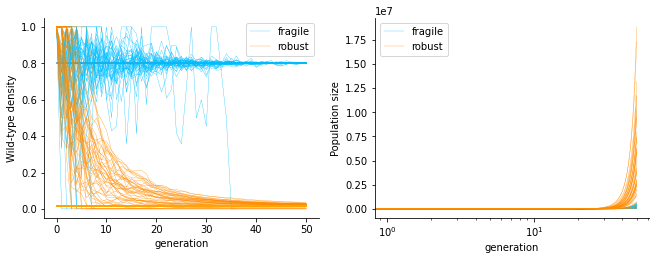

<Figure size 432x288 with 0 Axes>

In [6]:
#plt.style.use('default')
figure = plt.figure(constrained_layout=True, figsize=(9,3.5))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.plot(np.exp(-0.2/0.9)*np.ones(51))
ax.plot(data_fragile['wtFreq'][0], color='deepskyblue', linewidth=0.3, label='fragile')
for i in range(1,50) : 
    ax.plot(data_fragile['wtFreq'][i], color='deepskyblue', linewidth=0.3)

ax.plot(data_robust['wtFreq'][0], color='darkorange', linewidth=0.3, label='robust')

for i in range(1,50) : 
    ax.plot(data_robust['wtFreq'][i], color='darkorange', linewidth=0.3)
    ax.plot(np.exp(-0.2/0.05)*np.ones(51), color='orange')
plt.ylabel('Wild-type density')
plt.xlabel('generation')
plt.legend()

ax = figure.add_subplot(gs[0,1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xscale('log')
ax.plot(data_fragile['Pop_sizes'][0], color='deepskyblue', linewidth=0.3, label='fragile')
for i in range(1,50) : 
    ax.plot(data_fragile['Pop_sizes'][i], color='deepskyblue', linewidth=0.3)

ax.plot(data_robust['Pop_sizes'][0], color='darkorange', linewidth=0.3, label='robust')
for i in range(1,50) : 
    ax.plot(data_robust['Pop_sizes'][i], color='darkorange', linewidth=0.3)
plt.ylabel('Population size')
plt.xlabel('generation')
plt.legend()
plt.show()
plt.savefig('bp/muller_ratchet_white.pdf')

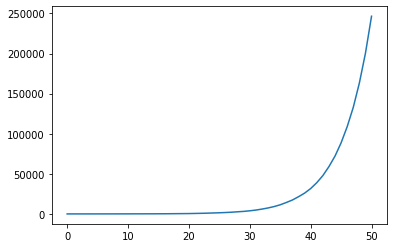

In [7]:
plt.plot(np.exp(-0.2/0.9)*np.array(data_fragile['Pop_sizes'][1]))

In [8]:
survival_fragile = []
survival_wt = []

for i in  range(50): 
    pop = data_fragile['Pop_sizes'][i]
    
    if len(pop)==51 : 
        survival_fragile.append(pop)
        survival_wt.append(np.array(data_fragile['wtFreq'][i])*np.array(pop))
        

In [9]:
len(survivale_fragile)

NameError: name 'survivale_fragile' is not defined

In [75]:
n_0 = np.mean(np.exp(-0.2/0.9)*np.array(survivale_fragile), axis=0)*(1-9/50.)

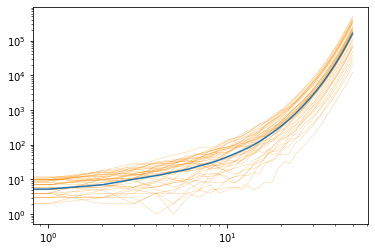

In [76]:
for wt in survival_wt : 
    plt.loglog(wt, color="darkorange", linewidth=0.2)
plt.loglog(n_0)

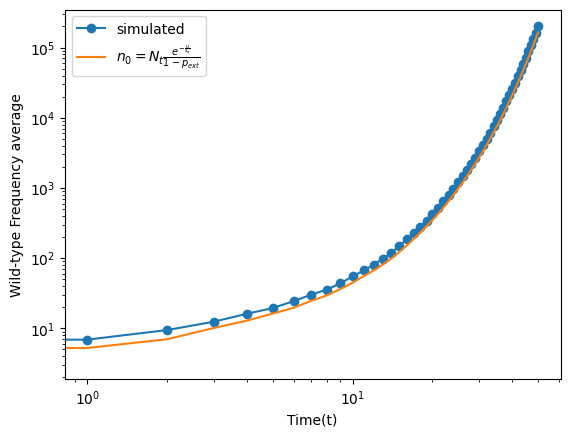

In [92]:
plt.style.use('default')
plt.loglog(np.mean(survival_wt,axis=0), 'o-', label='simulated')
plt.loglog(n_0,label=r'$n_0=N_t\frac{e^{-\frac{u}{s_d}}}{1-p_{ext}}$' )
plt.xlabel('Time(t)')
plt.ylabel('Wild-type Frequency average')
plt.legend()
plt.savefig('mean_n0.pdf')

In [10]:
data_r = pd.read_csv("bp/bottleneck_data_rV2.csv")
data_f = pd.read_csv("bp/bottleneck_data_fV2.csv")


bottleneck_r = pd.read_csv("bp/bottleneck_r.csv")
bottleneck_f = pd.read_csv("bp/bottleneck_f.csv")

bottleneckN_f = pd.read_csv("bp/bottleneckN_0f.csv")
bottleneckN_r = pd.read_csv("bp/bottleneckN_0r.csv")

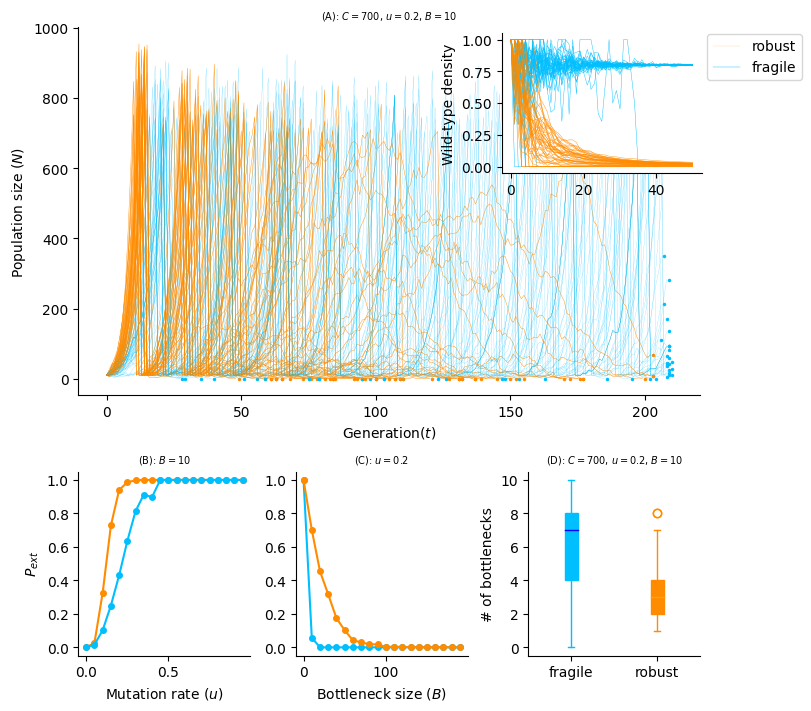

In [46]:
figure = plt.figure(constrained_layout=True, figsize=(8,7))
gs = figure.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[2, :-2])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

mut_r = [1]
mut_f = [1]
for i in np.arange(0.05, 1., 0.05) : 
    list_ = list(data_r[str(round(i,2))])
    mut_r.append(list_[10])
    
    list_ = list(data_f[str(round(i,2))])
    mut_f.append(list_[10])

ax.set_title(r"(B): $B=10$",fontsize=7)
ax.plot(np.arange(0.0, 1., 0.05),1-np.array(mut_r),'-o',ms=4., color='darkorange' ,linewidth=1.5, label='robust')
ax.plot(np.arange(0.0, 1., 0.05),1-np.array(mut_f),'-o',ms=4.,  color='deepskyblue', linewidth=1.5, label='fragile')
plt.xlabel(r'Mutation rate ($u$)')
plt.ylabel(r'$P_{ext}$')
#plt.legend()
ax = figure.add_subplot(gs[2, 1:2])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel(r'Bottleneck size ($B$)')
plt.title(r'(C): $u=0.2$',fontsize=7)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.plot(np.arange(0,5010,step=10)[:20],1-np.array([0]+list(bottleneckN_f["fragile"])[1:20]),'o-',ms=4.,color="deepskyblue" ,label="Fragile",linewidth=1.5)
ax.plot(np.arange(0,5010,step=10)[:20],1-np.array([0]+list(bottleneckN_r["robust"])[1:20]), 'o-',ms=4.,color='darkorange', label="Robust", linewidth=1.5)

#plt.legend()

ax = figure.add_subplot(gs[2, 2:])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.ylabel("# of bottlenecks")
plt.title(r'(D): $C=700$, $u=0.2$, $B=10$',fontsize=7)

ax.boxplot([data_fragile100['number_of_bn']],positions=[1.5], labels=["fragile"],
           patch_artist=True,boxprops=dict(facecolor='deepskyblue', color='deepskyblue'),medianprops=dict(color="blue")
          ,capprops=dict(color="deepskyblue"),whiskerprops=dict(color='deepskyblue'),flierprops=dict(color='deepskyblue', markeredgecolor="deepskyblue"))
ax.boxplot([data_robust100['number_of_bn']], positions=[2.5], labels=["robust"],
           patch_artist=True,boxprops=dict(facecolor='darkorange',color='darkorange'),medianprops=dict(color="orange")
          ,capprops=dict(color="darkorange"),whiskerprops=dict(color='darkorange'),flierprops=dict(color='darkorange', markeredgecolor="darkorange"))
ax =figure.add_subplot(gs[0:2, :])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel('Population size ($N$)')
plt.xlabel('Generation($t$)')
ax.set_title(r'(A): $C=700$, $u=0.2$, $B=10$',fontsize=7)
#plt.ylim((0,700.))
plt.style.use('default')
for i in range(50): 
    if i == 1 : 
        plt.plot(data_fragile100['Pop_sizes'][i],color='darkorange', linewidth=0.1, label='robust')
        plt.plot(len(data_robust100['Pop_sizes'][i]),data_robust100['Pop_sizes'][i][-1],'-o', ms=1.5,color='darkorange')
        plt.plot(data_fragile100['Pop_sizes'][i], color="deepskyblue",linewidth=0.3, label='fragile')
        plt.plot(len(data_fragile100['Pop_sizes'][i]),data_fragile100['Pop_sizes'][i][-1],'-o', ms=1.5,color='deepskyblue')
    plt.plot(data_robust100['Pop_sizes'][i],color='darkorange', linewidth=0.3)
    plt.plot(len(data_robust100['Pop_sizes'][i]),data_robust100['Pop_sizes'][i][-1],'-o', ms=1.5,color='darkorange')
    plt.plot(data_fragile100['Pop_sizes'][i], color="deepskyblue",linewidth=0.1) 
    plt.plot(len(data_fragile100['Pop_sizes'][i]),data_fragile100['Pop_sizes'][i][-1],'-o', ms=1.5,color='deepskyblue')

plt.legend(bbox_to_anchor=(1., 1.0))
ax2 = plt.axes([0.62, 0.76, 0.25, 0.2])
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
for i in range(1,50) : 
    ax2.plot(data_fragile['wtFreq'][i], color='deepskyblue', linewidth=0.3)

for i in range(1,50) : 
    ax2.plot(data_robust['wtFreq'][i], color='darkorange', linewidth=0.3)
    #ax.plot(np.exp(-0.2/0.05)*np.ones(51), color='orange')
plt.ylabel('Wild-type density')
#plt.xlabel('generation')
plt.savefig("bp/multi_bottleneckBP.pdf")
plt.show()

# Mutation vs. Bottleneck size

In [79]:

data_analysis_r1 = {}
data_analysis_f1 = {}
for u in np.arange(0.05, 0.4, 0.05) : 
    print(np.round(u,2)) 
    t = {}
    f = {}
    for i in range(1,21,1) : 
        
        with open("../data/bp/mu/1/"+str(np.round(u,2))+"/data_fragile"+str(i)+".json", 'r') as fp:
            json_data= json.load(fp)
            c = 0
            for pop in json_data['Pop_sizes'] : 
                if pop[-1] == 0 : 
                    c +=1 
        f[i] = c/50.
        with open("../data/bp/mu/1/"+str(np.round(u,2))+"/data_robust"+str(i)+".json", 'r') as fp:
            json_data= json.load(fp)
            r = 0
            for pop in json_data['Pop_sizes'] : 
                if pop[-1] == 0 : 
                    r +=1      
            
        t[i] = r/50.
    data_analysis_r1[np.round(u,2)] = t
    data_analysis_f1[np.round(u,2)] = f

0.05
0.1
0.15
0.2
0.25
0.3
0.35


In [133]:

data_analysis_r5 = {}
data_analysis_f5 = {}
for u in np.arange(0.05, 0.4, 0.05) : 
    print(np.round(u,2)) 
    t = {}
    f = {}
    for i in range(1,21,1) : 
        
        with open("../data/bp/mu/5/"+str(np.round(u,2))+"/data_fragile"+str(i)+".json", 'r') as fp:
            json_data= json.load(fp)
            c = 0
            for pop in json_data['Pop_sizes'] : 
                if pop[-1] == 0 : 
                    c +=1 
        f[i] = c/50.
        with open("../data/bp/mu/5/"+str(np.round(u,2))+"/data_robust"+str(i)+".json", 'r') as fp:
            json_data= json.load(fp)
            r = 0
            for pop in json_data['Pop_sizes'] : 
                if pop[-1] == 0 : 
                    r +=1      
            
        t[i] = r/50.
    data_analysis_r5[np.round(u,2)] = t
    data_analysis_f5[np.round(u,2)] = f

0.05
0.1
0.15
0.2
0.25
0.3
0.35


In [52]:
import seaborn as sns

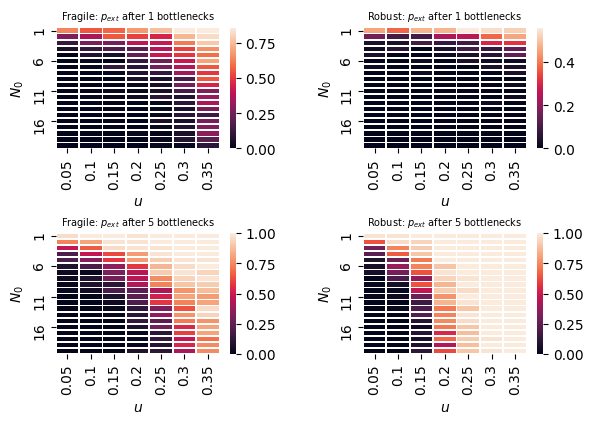

In [193]:
figure = plt.figure()
gs = figure.add_gridspec(nrows=2, ncols=2,left=0.1, right=0.9 ,wspace=0.5, hspace=0.7, bottom=0.2)
ax_1 = figure.add_subplot(gs[0,0])
ax_1.set_title(r'Fragile: $p_{ext}$ after 1 bottlenecks',fontsize=7)
ax1= sns.heatmap(pd.DataFrame(data_analysis_f1), ax=ax_1,linewidths=.5,yticklabels=5)
ax1.set(ylabel=r'$N_0$',xlabel=r'$u$')


ax_2 = figure.add_subplot(gs[0,1])
ax_2.set_title(r'Robust: $p_{ext}$ after 1 bottlenecks',fontsize=7)
ax2= sns.heatmap(pd.DataFrame(data_analysis_r1),ax=ax_2,linewidths=.5,yticklabels=5)
ax2.set(ylabel=r'$N_0$',xlabel=r'$u$')


ax_3 = figure.add_subplot(gs[1,0])
ax_3.set_title(r'Fragile: $p_{ext}$ after 5 bottlenecks',fontsize=7)
ax1= sns.heatmap(pd.DataFrame(data_analysis_f5), ax =ax_3,linewidths=.5,yticklabels=5)
ax1.set(ylabel=r'$N_0$',xlabel=r'$u$')

ax_4 = figure.add_subplot(gs[1,1])
ax_4.set_title(r'Robust: $p_{ext}$ after 5 bottlenecks', fontsize=7)
ax1= sns.heatmap(pd.DataFrame(data_analysis_r5), ax=ax_4, linewidths=.5,yticklabels=5)
ax1.set(ylabel=r'$N_0$',xlabel=r'$u$')
plt.savefig('bp/bottleneck_size_analysis.pdf')

# SEIR

# Version 1

In [97]:
infectioRata_data = []
lowest = []
highest = []
print("Loading Infection rate analysis data.........")
infectors_lowest = []
infectors_highest = []

least_f = []
least_r = []
infectors = []
    
    
for f in range(0,50,1) : 
   
    
    with open("../data/seir/simulated/Ir/lowest/seir_data"+str(f)+".json", 'r') as fp : 
        epidemic_data = json.load(fp)

    df = pd.read_csv('../data/seir/simulated/Ir/lowest/infection_nb'+str(f)+'.csv')

    lowest.append([epidemic_data['S'], epidemic_data['E'],epidemic_data['I'],epidemic_data['R'],
                 epidemic_data['fragile'], epidemic_data['robust']])
    infectors_lowest.append([df.values])

    with open("../data/seir/simulated/Ir/highest/seir_data"+str(f)+".json", 'r') as fp : 
        epidemic_data = json.load(fp)

    df = pd.read_csv('../data/seir/simulated/Ir/highest/infection_nb'+str(f)+'.csv')


    
    highest.append([epidemic_data['S'], epidemic_data['E'],epidemic_data['I'],epidemic_data['R'],
                 epidemic_data['fragile'], epidemic_data['robust']])
    infectors_highest.append([df.values])

    least_f.append(epidemic_data['fragile'][-1])
    least_r.append(epidemic_data['robust'][-1])
    #infectors.append([max(df.values[:,1]),max(df.values[:,2])])


#infectioRata_data.append([least_f, least_r, np.array(infectors)[:,0],np.array(infectors)[:,1]])
    
data_lowest = np.array(lowest)

means = np.mean(data_lowest, axis=0)
print(means.shape, means)
seir_data_low = {
    'S': means[0], 
    'E': means[1], 
    'I': means[2], 
    'R': means[3],
    'fragile': means[4], 
    'robust': means[5]
}
data_highest = np.array(highest)

means = np.mean(data_highest, axis=0)
print(means.shape, means)
seir_data_high = {
    'S': means[0], 
    'E': means[1], 
    'I': means[2], 
    'R': means[3],
    'fragile': means[4], 
    'robust': means[5]
}



Loading Infection rate analysis data.........
(6, 1001) [[4.90000e+03 4.89796e+03 4.89420e+03 ... 7.99400e+01 7.99400e+01
  7.99400e+01]
 [0.00000e+00 2.04000e+00 5.88000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.00000e+02 1.00000e+02 8.00000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [0.00000e+00 2.00000e+01 3.60000e+01 ... 4.92006e+03 4.92006e+03
  4.92006e+03]
 [5.00000e+01 5.11000e+01 5.31000e+01 ... 3.49296e+03 3.49296e+03
  3.49296e+03]
 [5.00000e+01 5.09400e+01 5.27800e+01 ... 1.49680e+03 1.49680e+03
  1.49680e+03]]
(6, 1001) [[4900.   3920.38 3142.5  ...   18.2    18.2    18.2 ]
 [   0.    980.   1763.96 ...    0.      0.      0.  ]
 [ 100.    100.     80.   ...    0.      0.      0.  ]
 [   0.     20.     36.   ... 4981.8  4981.8  4981.8 ]
 [  50.    540.5   925.54 ... 1842.06 1842.06 1842.06]
 [  50.    539.12  931.96 ... 3139.74 3139.74 3139.74]]


In [98]:
df_ratio_attack = pd.read_csv("../data/seir/simulated/ratio_attack.csv", header=0, index_col=0)

df_ratio_attack

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20
0.02,0.934192,0.847950,0.827820,0.939523,0.875640,0.820500,0.878339,0.880761,0.838578,0.897540,0.830832,0.853914,0.924948,0.864976,0.889293,0.859427,0.848089,0.861851,0.891790,0.946644
0.04,0.949308,0.752702,0.810620,0.834540,0.754713,0.795052,0.747947,0.778126,0.769721,0.815556,0.800523,0.773996,0.734321,0.767724,0.735812,0.725948,0.746423,0.773053,0.733149,0.749793
0.06,0.931569,0.763739,0.663363,0.674806,0.631061,0.644197,0.675084,0.706518,0.663063,0.686911,0.642309,0.657558,0.661133,0.649091,0.660859,0.618152,0.619963,0.661156,0.639886,0.653176
0.08,1.055677,0.743899,0.574314,0.578800,0.567899,0.604227,0.592864,0.516077,0.541548,0.578034,0.579792,0.590339,0.594136,0.536841,0.572083,0.558361,0.538235,0.561554,0.596570,0.575052
0.10,1.256541,0.688176,0.538242,0.526104,0.477490,0.459495,0.464772,0.490536,0.479300,0.456665,0.440305,0.491890,0.451828,0.460711,0.453701,0.459854,0.455240,0.490757,0.464987,0.459007
0.12,1.240809,0.756505,0.540372,0.480827,0.441418,0.403706,0.359995,0.390824,0.384850,0.410835,0.390439,0.374948,0.385243,0.388312,0.347165,0.383745,0.371411,0.410238,0.382935,0.397819
0.14,1.686205,0.745634,0.576055,0.442794,0.395675,0.373868,0.354096,0.331033,0.321007,0.305995,0.335130,0.340303,0.306165,0.351178,0.312698,0.334759,0.346622,0.322053,0.314235,0.333872
0.16,1.785155,0.848727,0.549925,0.468454,0.365757,0.348982,0.329788,0.292658,0.286008,0.272595,0.273885,0.272449,0.288995,0.291843,0.254236,0.268074,0.273729,0.287999,0.273561,0.277148
0.18,1.878586,0.944380,0.633752,0.440508,0.385426,0.328909,0.322933,0.305827,0.276495,0.275024,0.247973,0.248751,0.255337,0.244875,0.248128,0.246883,0.237930,0.235342,0.220706,0.235484
0.20,2.214635,1.057672,0.705321,0.510575,0.392956,0.362769,0.322401,0.309244,0.273561,0.264705,0.241928,0.238861,0.231831,0.231073,0.242855,0.216102,0.214183,0.216989,0.226542,0.201490


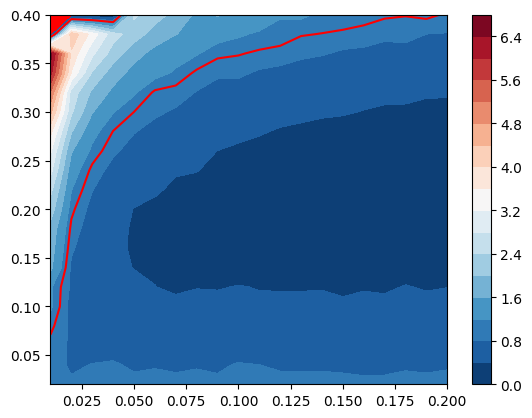

In [99]:
x = np.array(df_ratio_attack.columns, dtype=float)
y = np.array(df_ratio_attack.index, dtype=float)
X, Y = np.meshgrid(x, y)

Z = df_ratio_attack.values

plt.contourf(X,Y,Z,20,cmap="RdBu_r")

plt.colorbar()

plt.contour(X,Y,Z, levels=[1.0], colors='red')
plt.contourf(X,Y,Z, levels=[0.01,0.1], colors='red')

In [100]:
df_S_V1 = []
infectors_S_V1 = []
for f in range(0,50,1) : 
   
    
    with open("../data/seir/simulated/Ir/V1/0.40/seir_data"+str(f)+".json", 'r') as fp : 
        epidemic_data = json.load(fp)
    if epidemic_data['fragile'][-1] <4000 : 
        
        df_S_V1.append([epidemic_data['S'], epidemic_data['E'],epidemic_data['I'],epidemic_data['R'],
                 epidemic_data['fragile'], epidemic_data['robust']])
    
    df = pd.read_csv('../data/seir/simulated/Ir/V1/0.40/infection_nb'+str(f)+'.csv')

    infectors_S_V1.append([df.values])  

In [101]:
len(df_S_V1)

50

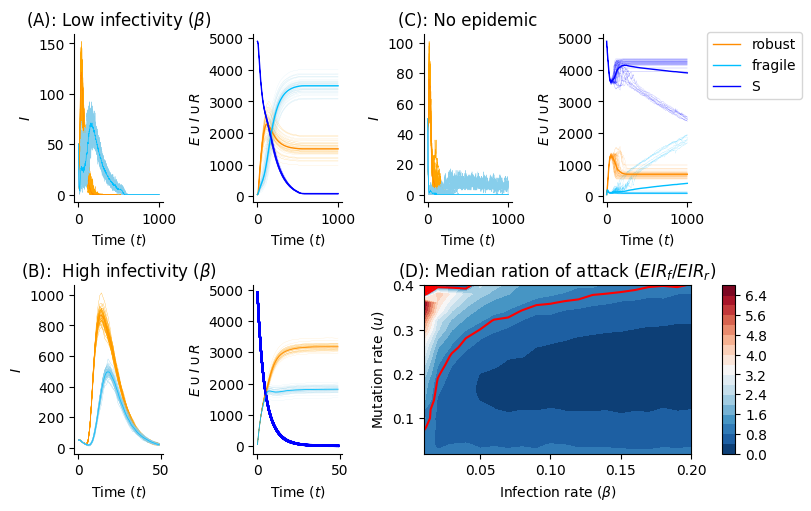

In [74]:
figure = plt.figure(constrained_layout=True, figsize=(8,5))
gs = figure.add_gridspec(nrows=2, ncols=4, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
#Low infection rate 
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel(r'$I$')
plt.title(r"(A): Low infectivity $(\beta)$")
plt.xlabel(r'Time ($t$)')
box_data = []

for i in range(50) : 
    box_data.append(infectors_lowest[i][0][:,1])

for data in box_data : 
    plt.plot(data, color='orange', linewidth=0.3)
plt.plot(np.median(infectors_lowest, axis=0)[0][:,1],color='darkorange', linewidth=0.5, label='robust')

box_data = []
for i in range(50) : 
    box_data.append(infectors_lowest[i][0][:,2])

for data in box_data : 
    plt.plot(data,color='skyblue',linewidth=0.3)
plt.plot(np.median(infectors_lowest, axis=0)[0][:,2],color='deepskyblue', linewidth=0.5, label='fragile')
#plt.legend()
ax = figure.add_subplot(gs[0, 1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel(r'$E \cup I \cup R$')
plt.xlabel(r'Time ($t$)')
#plt.title("(b):$(EIR_f >EIR_r)= "+str(result.count(1))+"/50$")

for data in data_lowest : 
    ax.plot(data[5], color='orange',linewidth=0.05)
    ax.plot(data[4], color='skyblue',linewidth=0.05)
    ax.plot(data[0], color='blue',linewidth=0.05)
    
ax.plot(seir_data_low['robust'],label='robust',color='darkorange',linewidth=1)
ax.plot(seir_data_low['fragile'],label='fragile',color="deepskyblue",linewidth=1)
ax.plot(seir_data_low['S'],label='S',color="blue",linewidth=1)
#plt.legend()
#ax = figure.add_subplot(gs[1, :2])
ax = figure.add_subplot(gs[0,2])
#Low infection rate 
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel(r'$I$')
plt.title(r"(C): No epidemic")
plt.xlabel(r'Time ($t$)')
box_data = []

for i in range(50) : 
    box_data.append(infectors_S_V1[i][0][:,1])

for data in box_data : 
    plt.plot(data, color='orange', linewidth=0.3)
plt.plot(np.median(infectors_S_V1, axis=0)[0][:,1],color='darkorange', linewidth=0.5, label='robust')

box_data = []
for i in range(50) : 
    box_data.append(infectors_S_V1[i][0][:,2])

for data in box_data : 
    plt.plot(data,color='skyblue',linewidth=0.3)
plt.plot(np.median(infectors_S_V1, axis=0)[0][:,2],color='deepskyblue', linewidth=0.5, label='fragile')
#plt.legend()
ax = figure.add_subplot(gs[0,3])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel(r'$E \cup I \cup R$')
plt.xlabel(r'Time ($t$)')
#plt.title("(b):$(EIR_f >EIR_r)= "+str(result.count(1))+"/50$")

for data in df_S_V1 : 
    ax.plot(data[5], color='darkorange',linewidth=0.05)
    ax.plot(data[4], color='deepskyblue',linewidth=0.05)
    ax.plot(data[0], color='blue',linewidth=0.05)
    
ax.plot(np.mean(df_S_V1, axis=0)[5],label='robust',color='darkorange',linewidth=1)
ax.plot(np.mean(df_S_V1, axis=0)[4],label='fragile',color="deepskyblue",linewidth=1)
ax.plot(np.mean(df_S_V1, axis=0)[0],label='S',color="blue",linewidth=1)
plt.legend(bbox_to_anchor=(1.1, 1.05))

ax = figure.add_subplot(gs[1,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel(r'$I$')
plt.title(r"(B):  High infectivity $(\beta)$")
plt.xlabel(r'Time ($t$)')
box_data = []

for i in range(50) : 
    box_data.append(infectors_highest[i][0][:,1])

for data in box_data : 
    ax.plot(data[:50], color='orange', linewidth=0.2)
ax.plot(np.median(infectors_highest, axis=0)[0][:,1][:50], color='darkorange', label='robust',linewidth=0.5)

box_data = []
for i in range(50) : 
    box_data.append(infectors_highest[i][0][:,2][:50])

for data in box_data : 
    ax.plot(data[:50],color='skyblue',linewidth=0.2)
ax.plot(np.median(infectors_highest, axis=0)[0][:,2][:50],color='deepskyblue', label='fragile', linewidth=0.5)
#plt.legend()
ax = figure.add_subplot(gs[1, 1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel(r'$E \cup I \cup R$')
plt.xlabel(r'Time ($t$)')
for data in data_highest : 
    ax.plot(data[5][:50], color='orange',linewidth=0.05)
    ax.plot(data[4][:50], color='skyblue',linewidth=0.05)
    ax.plot(data[0][:50], color='blue')
  
ax.plot(seir_data_high['robust'][:50],label='robust',color='darkorange',linewidth=0.6)
ax.plot(seir_data_high['fragile'][:50],label='fragile',color="deepskyblue",linewidth=0.6)
ax.plot(seir_data_high['S'][:50],label='S',color="blue",linewidth=1)
#plt.legend()
ax = figure.add_subplot(gs[1, 2:])
plt.xlabel(r'Infection rate ($\beta$)')
plt.ylabel(r'Mutation rate ($u$)')
plt.title(r'(D): Median ration of attack $(EIR_f/EIR_r)$')
x = np.array(df_ratio_attack.columns, dtype=float)
y = np.array(df_ratio_attack.index, dtype=float)
X, Y = np.meshgrid(x, y)

Z = df_ratio_attack.values

plt.contourf(X,Y,Z,20,cmap="RdBu_r")


plt.colorbar()

plt.contour(X,Y,Z, levels=[1.0], colors='red')
plt.contourf(X,Y,Z, levels=[0.01,0.1], colors='red')

plt.savefig("seir/seirV1_2.pdf")
plt.show()




# Version 2

In [75]:
infectioRata_data = []
lowest = []
highest = []
print("Loading Infection rate analysis data.........")
infectors_lowest = []
infectors_highest = []

least_f = []
least_r = []
infectors = []
    
    
for f in range(0,50,1) : 
   
    
    with open("../data/seir/simulated/Ir/V2/lowest/seir_data"+str(f)+".json", 'r') as fp : 
        epidemic_data = json.load(fp)

    df = pd.read_csv('../data/seir/simulated/Ir/V2/lowest/infection_nb'+str(f)+'.csv')

    lowest.append([epidemic_data['S'], epidemic_data['E'],epidemic_data['I'],epidemic_data['R'],
                 epidemic_data['fragile'], epidemic_data['robust']])
    infectors_lowest.append([df.values])

    with open("../data/seir/simulated/Ir/V2/highest/seir_data"+str(f)+".json", 'r') as fp : 
        epidemic_data = json.load(fp)

    df = pd.read_csv('../data/seir/simulated/Ir/V2/highest/infection_nb'+str(f)+'.csv')


    
    highest.append([epidemic_data['S'], epidemic_data['E'],epidemic_data['I'],epidemic_data['R'],
                 epidemic_data['fragile'], epidemic_data['robust']])
    infectors_highest.append([df.values])

    least_f.append(epidemic_data['fragile'][-1])
    least_r.append(epidemic_data['robust'][-1])
    #infectors.append([max(df.values[:,1]),max(df.values[:,2])])


#infectioRata_data.append([least_f, least_r, np.array(infectors)[:,0],np.array(infectors)[:,1]])
    
data_lowest = np.array(lowest)

means = np.mean(data_lowest, axis=0)
print(means.shape, means)
seir_data_low = {
    'S': means[0], 
    'E': means[1], 
    'I': means[2], 
    'R': means[3],
    'fragile': means[4], 
    'robust': means[5]
}
data_highest = np.array(highest)

means = np.mean(data_highest, axis=0)
print(means.shape, means)
seir_data_high = {
    'S': means[0], 
    'E': means[1], 
    'I': means[2], 
    'R': means[3],
    'fragile': means[4], 
    'robust': means[5]
}




Loading Infection rate analysis data.........
(6, 1001) [[4.90000e+03 4.89984e+03 4.89966e+03 ... 5.88100e+02 5.88100e+02
  5.88100e+02]
 [0.00000e+00 1.60000e-01 3.40000e-01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.00000e+02 1.00000e+02 8.00000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [0.00000e+00 2.00000e+01 3.60000e+01 ... 4.41190e+03 4.41190e+03
  4.41190e+03]
 [5.00000e+01 5.01600e+01 5.02200e+01 ... 3.68330e+03 3.68330e+03
  3.68330e+03]
 [5.00000e+01 5.00000e+01 5.01200e+01 ... 1.02104e+03 1.02104e+03
  1.02104e+03]]
(6, 1001) [[4.90000e+03 4.89684e+03 4.89212e+03 ... 2.56800e+01 2.56800e+01
  2.56800e+01]
 [0.00000e+00 3.20000e+00 8.02000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.00000e+02 1.00000e+02 8.00000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [0.00000e+00 2.00000e+01 3.60000e+01 ... 4.97432e+03 4.97432e+03
  4.97432e+03]
 [5.00000e+01 5.18200e+01 5.43200e+01 ... 1.41040e+03 1.41040e+03
  1.41040e+03]
 [5.00000e+01 5.13800e+01 5.37400e+01 ... 

In [76]:
df_ratio_attackV2 = pd.read_csv("../data/seir/simulated/diff_med.csv", header=0, index_col=0)

df_ratio_attackV2

epi_data_V2 = pd.read_csv("../data/seir/simulated/Epidemic_dataV2.csv", header=0, index_col=0)/4900

In [77]:
df_S_V2 = []

infectors_S_V2 = []

for f in range(0,50,1) : 
   
    
    with open("../data/seir/simulated/Ir/V2/0.40/seir_data"+str(f)+".json", 'r') as fp : 
        epidemic_data = json.load(fp)

    df_S_V2.append([epidemic_data['S'], epidemic_data['E'],epidemic_data['I'],epidemic_data['R'],
                 epidemic_data['fragile'], epidemic_data['robust']])
    
    df = pd.read_csv('../data/seir/simulated/Ir/V2/0.40/infection_nb'+str(f)+'.csv')

    infectors_S_V2.append([df.values])  

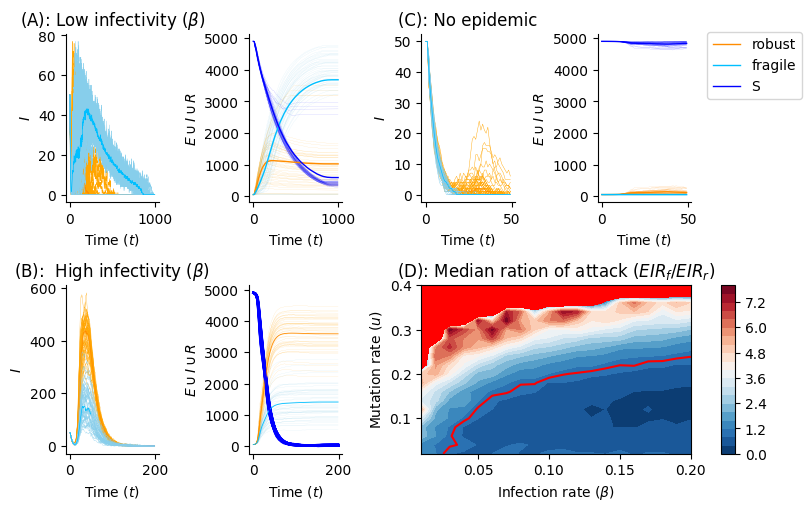

In [78]:
figure = plt.figure(constrained_layout=True, figsize=(8,5))
gs = figure.add_gridspec(nrows=2, ncols=4, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
#Low infection rate 
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel(r'$I$')
plt.title(r"(A): Low infectivity $(\beta)$")
plt.xlabel(r'Time ($t$)')
box_data = []

for i in range(50) : 
    box_data.append(infectors_lowest[i][0][:,1])

for data in box_data : 
    plt.plot(data, color='orange', linewidth=0.3)
plt.plot(np.median(infectors_lowest, axis=0)[0][:,1],color='darkorange', linewidth=0.5, label='robust')

box_data = []
for i in range(50) : 
    box_data.append(infectors_lowest[i][0][:,2])

for data in box_data : 
    plt.plot(data,color='skyblue',linewidth=0.3)
plt.plot(np.median(infectors_lowest, axis=0)[0][:,2],color='deepskyblue', linewidth=0.5, label='fragile')
#plt.legend()
ax = figure.add_subplot(gs[0, 1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel(r'$E \cup I \cup R$')
plt.xlabel(r'Time ($t$)')
#plt.title("(b):$(EIR_f >EIR_r)= "+str(result.count(1))+"/50$")

for data in data_lowest : 
    ax.plot(data[5], color='orange',linewidth=0.05)
    ax.plot(data[4], color='skyblue',linewidth=0.05)
    ax.plot(data[0], color='blue',linewidth=0.05)
    
ax.plot(seir_data_low['robust'],label='robust',color='darkorange',linewidth=1)
ax.plot(seir_data_low['fragile'],label='fragile',color="deepskyblue",linewidth=1)
ax.plot(seir_data_low['S'],label='S',color="blue",linewidth=1)
#plt.legend()
#ax = figure.add_subplot(gs[1, :2])
ax = figure.add_subplot(gs[0,2])
#Low infection rate 
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel(r'$I$')
plt.title(r"(C): No epidemic")
plt.xlabel(r'Time ($t$)')
box_data = []

for i in range(50) : 
    box_data.append(infectors_S_V2[i][0][:,1])

for data in box_data : 
    plt.plot(data[:50], color='orange', linewidth=0.3)
plt.plot(np.median(infectors_S_V2, axis=0)[0][:,1][:50],color='darkorange', linewidth=0.5, label='robust')

box_data = []
for i in range(50) : 
    box_data.append(infectors_S_V2[i][0][:,2])

for data in box_data : 
    plt.plot(data[:50],color='skyblue',linewidth=0.3)
plt.plot(np.median(infectors_S_V2, axis=0)[0][:,2][:50],color='deepskyblue', linewidth=0.5, label='fragile')
#plt.legend()
ax = figure.add_subplot(gs[0,3])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel(r'$E \cup I \cup R$')
plt.xlabel(r'Time ($t$)')
#plt.title("(b):$(EIR_f >EIR_r)= "+str(result.count(1))+"/50$")

for data in df_S_V2 : 
    ax.plot(data[5][:50], color='darkorange',linewidth=0.05)
    ax.plot(data[4][:50], color='deepskyblue',linewidth=0.05)
    ax.plot(data[0][:50], color='blue',linewidth=0.05)
    
ax.plot(np.mean(df_S_V2, axis=0)[5][:50],label='robust',color='darkorange',linewidth=1)
ax.plot(np.mean(df_S_V2, axis=0)[4][:50],label='fragile',color="deepskyblue",linewidth=1)
ax.plot(np.mean(df_S_V2, axis=0)[0][:50],label='S',color="blue",linewidth=1)
plt.legend(bbox_to_anchor=(1.1, 1.05))

ax = figure.add_subplot(gs[1,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel(r'$I$')
plt.title(r"(B):  High infectivity $(\beta)$")
plt.xlabel(r'Time ($t$)')
box_data = []

for i in range(50) : 
    box_data.append(infectors_highest[i][0][:,1])

for data in box_data : 
    ax.plot(data[:200], color='orange', linewidth=0.2)
ax.plot(np.median(infectors_highest, axis=0)[0][:,1][:200], color='darkorange', label='robust',linewidth=0.5)

box_data = []
for i in range(50) : 
    box_data.append(infectors_highest[i][0][:,2])

for data in box_data : 
    ax.plot(data[:200],color='skyblue',linewidth=0.2)
ax.plot(np.median(infectors_highest, axis=0)[0][:,2][:50],color='deepskyblue', label='fragile', linewidth=0.5)
#plt.legend()
ax = figure.add_subplot(gs[1, 1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel(r'$E \cup I \cup R$')
plt.xlabel(r'Time ($t$)')
for data in data_highest : 
    ax.plot(data[5][:200], color='orange',linewidth=0.05)
    ax.plot(data[4][:200], color='skyblue',linewidth=0.05)
    ax.plot(data[0][:200], color='blue')
  
ax.plot(seir_data_high['robust'][:200],label='robust',color='darkorange',linewidth=0.6)
ax.plot(seir_data_high['fragile'][:200],label='fragile',color="deepskyblue",linewidth=0.6)
ax.plot(seir_data_high['S'][:200],label='S',color="blue",linewidth=1)
#plt.legend()
ax = figure.add_subplot(gs[1, 2:])
plt.xlabel(r'Infection rate ($\beta$)')
plt.ylabel(r'Mutation rate ($u$)')
plt.title(r'(D): Median ration of attack $(EIR_f/EIR_r)$')
x = np.array(df_ratio_attackV2.columns, dtype=float)
y = np.array(df_ratio_attackV2.index, dtype=float)
X, Y = np.meshgrid(x, y)

Z = df_ratio_attackV2.values

plt.contourf(X,Y,Z,20,cmap="RdBu_r")

plt.colorbar()

plt.contour(X,Y,Z, levels=[1.0], colors='red')

x = np.array(epi_data_V2.columns, dtype=float)
y = np.array(epi_data_V2.index, dtype=float)
X_s, Y_s = np.meshgrid(x, y)

Z_s = epi_data_V2.values
plt.contourf(X_s,Y_s,Z_s, levels=[0.7,1.0], colors='red')

plt.savefig("seir/seirV2.pdf")
plt.show()





In [57]:
epi_data_V2

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20
0.02,601.5,107.0,59.5,41.5,30.5,21.0,15.0,9.0,7.0,6.5,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.04,721.5,129.0,69.0,44.0,37.5,26.5,20.0,15.0,12.0,9.0,6.0,5.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0
0.06,834.5,147.5,77.5,52.0,39.0,31.5,26.0,19.0,15.5,17.0,13.0,9.5,7.5,7.0,5.0,4.0,3.0,3.0,3.0,2.0
0.08,983.0,195.5,85.0,57.5,38.5,32.5,25.0,23.0,23.0,19.5,17.0,20.0,17.0,16.5,19.5,15.5,12.0,12.0,13.0,11.0
0.10,1128.5,278.5,98.0,66.0,42.5,35.0,30.0,23.0,20.5,19.0,18.0,18.0,19.0,20.0,17.0,20.5,21.0,24.5,22.0,24.0
0.12,1310.0,367.0,117.5,78.0,52.0,42.0,33.5,25.0,24.0,17.0,19.0,15.5,14.0,15.5,15.0,13.5,13.0,14.0,11.0,14.0
0.14,1582.0,484.5,165.0,92.5,65.5,53.5,38.0,31.0,24.0,22.0,17.0,16.0,13.5,14.0,12.0,12.0,12.0,11.0,10.0,9.0
0.16,1837.5,673.0,248.5,120.0,86.0,61.0,49.0,37.5,30.5,29.0,23.5,18.5,17.0,16.0,14.0,11.0,11.0,10.0,9.0,9.0
0.18,2098.0,900.5,380.5,175.5,100.5,75.0,59.0,51.5,43.0,35.0,26.0,27.5,19.5,18.5,18.0,17.0,12.0,11.0,10.0,10.0
0.20,2420.0,1162.5,574.0,291.0,151.5,108.5,80.5,64.5,54.0,46.5,36.0,32.5,27.5,24.5,23.0,21.0,18.0,18.0,15.0,13.0


# Incubation Time

In [307]:
tau_at_low_r = []
tau_at_low_f = []
for f in range(0,50,1) : 
    df = pd.read_csv('../data/seir/simulated/IC/low_beta/final_host'+str(f)+'.csv')
    df_r = df[df['viralParams']=='R']
   
    tau_at_low_r += list(df_r[df_r['tau']>0]['tau'].values)
    
    df_f = df[df['viralParams']=='F']
    tau_at_low_f += list(df_f[df_f['tau']>0]['tau'].values)

simul_low_df_r = pd.DataFrame(tau_at_low_r)

simul_low_df_f = pd.DataFrame(tau_at_low_f)
simul_low_df_f[0]

0         23.0
1         25.0
2         32.0
3         22.0
4         25.0
          ... 
127707    28.0
127708    29.0
127709    26.0
127710    41.0
127711    23.0
Name: 0, Length: 127712, dtype: float64

In [308]:
analitic_tau_at_low_r = []
analitic_tau_at_low_f = []
for f in range(0,50,1) : 
    df = pd.read_csv('../data/seir/analytic/IC/low_beta/ic_t'+str(f)+'.csv')
    df_r = df[df['0']==str({'mu':0.1,'sb':0.5, 'sd':0.05})]
    analitic_tau_at_low_r += list(df_r[df_r['1']>0]['1'].values)
    
    df_f = df[df['0']==str({'mu':0.1,'sb':0.5, 'sd':0.9})]
    analitic_tau_at_low_f += list(df_f[df_f['1']>0]['1'].values)
    
anal_low_df_f = pd.DataFrame(analitic_tau_at_low_f)
anal_low_df_r = pd.DataFrame(analitic_tau_at_low_r)

In [312]:
tau_at_high_r = []
tau_at_high_f = []
for f in range(0,50,1) : 
    df = pd.read_csv('../data/seir/simulated/IC/high_beta/final_host'+str(f)+'.csv')
    df = df[df['status']=='R']
    df_r = df[df['viralParams']=='R']
   
    tau_at_high_r += list(df_r[df_r['tau']>0]['tau'].values)
    
    df_f = df[df['viralParams']=='F']
    tau_at_high_f += list(df_f[df_f['tau']>0]['tau'].values)

simul_high_df_r = pd.DataFrame(tau_at_high_r)

simul_high_df_f = pd.DataFrame(tau_at_high_f)
print(max(simul_high_df_r.values))

[165.]


In [310]:
analitic_tau_at_high_r = []
analitic_tau_at_high_f = []
for f in range(0,50,1) : 
    df = pd.read_csv('../data/seir/analytic/IC/high_beta/ic_t'+str(f)+'.csv')
    df_r = df[df['0']==str({'mu':0.1,'sb':0.5, 'sd':0.05})]
    analitic_tau_at_high_r += list(df_r[df_r['1']>0]['1'].values)
    
    df_f = df[df['0']==str({'mu':0.1,'sb':0.5, 'sd':0.9})]
    analitic_tau_at_high_f += list(df_f[df_f['1']>0]['1'].values)
    
anal_high_df_f = pd.DataFrame(analitic_tau_at_high_f)
anal_high_df_r = pd.DataFrame(analitic_tau_at_high_r)

In [314]:
simul_high_df_r

,0
0,24.0
1,20.0
2,23.0
3,23.0
4,22.0
...,...
128152,22.0
128153,26.0
128154,21.0
128155,22.0


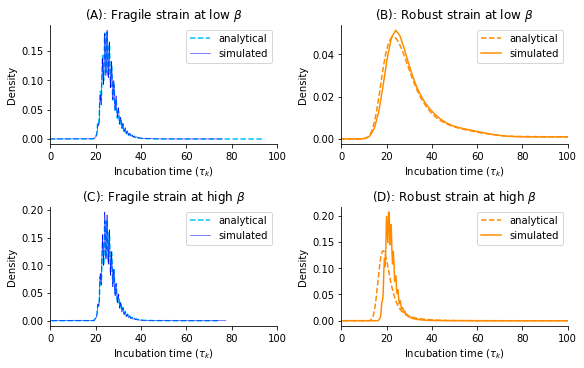

In [313]:
N = 2000
u = 0.1
B = 5
figure = plt.figure(constrained_layout=True, figsize=(8,5))
gs = figure.add_gridspec(nrows=2, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


plt.title(r'(A): Fragile strain at low $\beta$')
anal_low_df_f[0].plot.kde(label='analytical',xlim=(0.,100), linestyle='--', color='deepskyblue')
simul_low_df_f[0].plot.kde(label='simulated',xlim=(0.,100),color='blue', linewidth=.5)
plt.legend()
plt.ylabel('Density')
plt.xlabel(r'Incubation time ($\tau_k$)')
plt.legend()

ax = figure.add_subplot(gs[0,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.title(r'(B): Robust strain at low $\beta$')
anal_low_df_r[0].plot.kde(label='analytical', xlim=(0.,100),linestyle='--', color='darkorange')
simul_low_df_r[0].plot.kde(label='simulated', xlim=(0.,100), color='darkorange')
plt.legend()
plt.ylabel('Density')
plt.xlabel(r'Incubation time ($\tau_k$)')
plt.legend()
ax = figure.add_subplot(gs[1,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.title(r'(C): Fragile strain at high $\beta$')
anal_high_df_f[0].plot.kde(label='analytical',xlim=(0.,100), linestyle='--', color='deepskyblue')
simul_high_df_f[0].plot.kde(label='simulated',xlim=(0.,100), color='blue', linewidth=.5)
plt.legend()
plt.ylabel('Density')
plt.xlabel(r'Incubation time ($\tau_k$)')
plt.legend()

ax = figure.add_subplot(gs[1,1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.title(r'(D): Robust strain at high $\beta$')
anal_high_df_r[0].plot.kde(label='analytical', xlim=(0.,100.), linestyle='--', color='darkorange')
simul_high_df_r[0].plot.kde(label='simulated', xlim=(0.,100.), color='darkorange')
plt.legend()
plt.ylabel('Density')
plt.xlabel(r'Incubation time ($\tau_k$)')
plt.legend()

plt.savefig('seir/incubation_timeV1.pdf')

In [253]:
dF

,Unnamed: 0,0,1,2,3
0,0,"{'mu': 0.1, 'sb': 0.5, 'sd': 0.05}",21.0,370,0
11,11,"{'mu': 0.1, 'sb': 0.5, 'sd': 0.05}",19.0,427,0
14,14,"{'mu': 0.1, 'sb': 0.5, 'sd': 0.05}",28.0,355,0
17,17,"{'mu': 0.1, 'sb': 0.5, 'sd': 0.05}",18.0,376,0
20,20,"{'mu': 0.1, 'sb': 0.5, 'sd': 0.05}",25.0,336,0
...,...,...,...,...,...
5028,5028,"{'mu': 0.1, 'sb': 0.5, 'sd': 0.05}",118.0,124,5
5044,5044,"{'mu': 0.1, 'sb': 0.5, 'sd': 0.05}",144.0,86,5
5066,5066,"{'mu': 0.1, 'sb': 0.5, 'sd': 0.05}",146.0,90,5
5087,5087,"{'mu': 0.1, 'sb': 0.5, 'sd': 0.05}",111.0,355,5


<AxesSubplot:ylabel='Density'>

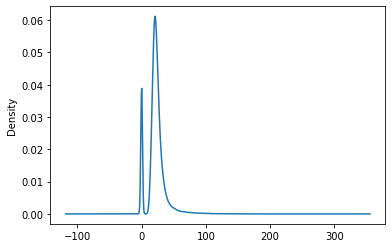

In [153]:
anal_high_df_r[0].plot.kde()
#anal_low_df_r[0].plot.kde()

In [184]:
data_tau_r = []
for f in range(0,100, 10) : 
    
    df = pd.read_csv('../data/seir/simulated/IC/host'+str(f)+'.csv')
    df_r = df[df['viralParams']==str({'mu':0.1,'sb':0.5, 'sd':0.9})]
   
    data_tau_r.append(list(df_r[df_r['tau']>0]['tau'].values))
    

In [164]:
low_beta_means_f = []
for f in range(50) : 
    print(f)
    df = pd.read_csv('../data/seir/simulated/IC/low_beta/final_host'+str(f)+'.csv')
    mean_dist_f = []
    df = df[df['status']=='E']
    for i in rAange(0,100) : 
        df = df[df['status']=='R']
        phase1 = df[df['phase']==i]
        df_r = phase1[phase1['viralParams']=='F']
        tau1 = df_r[df_r['tau']>0]
        if len(tau1['tau'].values) > 0 : 
            mean_dist_f.append(np.mean(tau1['tau'].values))
    if len(mean_dist_f) == 100 : 
        low_beta_means_f.append(mean_dist_f)
#plt.legend()



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [348]:
low_beta_means_r = []
for f in range(50) : 
    print(f)
    df = pd.read_csv('../data/seir/simulated/IC/low_beta/final_host'+str(f)+'.csv')
    mean_dist_r = []
    for i in range(0,100) : 
        df = df[df['status']=='R']
        phase1 = df[df['phase']==i]
        df_r = phase1[phase1['viralParams']=='R']
        tau1 = df_r[df_r['tau']>0]
        if len(tau1['tau'].values) > 0 : 
            mean_dist_r.append(np.mean(tau1['tau'].values))
    low_beta_means_r.append(mean_dist_r)
#plt.legend()




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [355]:
np.mean(low_beta_means_f, axis=0)

array([18.29644894, 18.49810429, 18.37688606, 18.25243004, 18.53734684,
       18.51923935, 18.54197777, 18.51900848, 18.16151311, 18.42705822,
       18.35202776, 18.54040646, 18.40632381, 18.45327817, 18.53292515,
       18.31015438, 18.64736649, 18.72655299, 19.05496997, 18.8266849 ,
       18.77843725, 18.49740466, 19.00779688, 18.96969271, 18.89592746,
       18.80163075, 18.9022341 , 18.92213969, 18.95383868, 18.75691082,
       18.66892923, 19.05893042, 19.09650712, 18.73343848, 18.89151526,
       18.73842268, 18.7880415 , 18.75204976, 18.5649788 , 18.82192447,
       18.7888557 , 18.87255925, 18.4737919 , 18.7507965 , 18.65734424,
       18.93917007, 18.60117892, 18.72246891, 19.0448886 , 19.03810026,
       18.89733546, 18.5175362 , 18.59308339, 19.04491202, 18.97751483,
       18.7164699 , 18.57096986, 18.75714793, 18.5644973 , 18.9089619 ,
       18.67314556, 18.96920081, 18.92734391, 18.78662539, 18.77321238,
       18.82019652, 19.04533676, 18.69030727, 18.74114489, 18.60

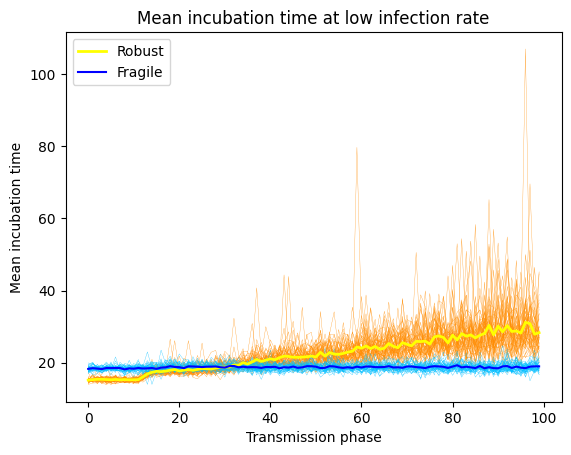

In [367]:
plt.title('Mean incubation time at low infection rate')
plt.xlabel('Transmission phase')


for i in range(len(low_beta_means_r)): 
    plt.plot(low_beta_means_r[i], color='darkorange', linewidth=0.2)
for i in range(len(low_beta_means_f)): 
    plt.plot(low_beta_means_f[i], color='deepskyblue', linewidth=0.2)

plt.plot(np.mean(low_beta_means_r, axis=0), color='yellow', linewidth=2, label='Robust')
plt.plot(np.mean(low_beta_means_f, axis=0), color='blue', linewidth=1.5, label='Fragile')

  
plt.ylabel('Mean incubation time')
plt.legend()

plt.savefig('seir/simulated_IC_50.pdf')


In [346]:
len(low_beta_means_f)

50

In [218]:
df = pd.DataFrame({'A': ['a', 'b', 'c'],'B': ['x', 'y', 'z']})
new_df = pd.DataFrame({'B': ['d', 'e', 'f', 'g', 'h', 'i']})
df.update(new_df)

df.update(pd.DataFrame({'B': ['d', 't', 'f', 'g', 'h', 'i']}))

In [219]:
df

,A,B
0,a,d
1,b,t
2,c,f


In [214]:
new_df = pd.DataFrame({'B': ['d', 't', 'f', 'g', 'h', 'i']})
df.update(new_df)

In [422]:
df = pd.read_csv('../data/seir/simulated/IC/final_host0_test.csv')
df

,Unnamed: 0,id,status,viralParams,pop,tau,phase
0,0,0,R,F,"[0.14999999999999997, 0.14999999999999997, 0.1...",26.0,1.0
1,1,1,R,F,"[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0.14999999...",24.0,0.0
2,2,2,R,F,"[1.5, 1.5, 1.5, 1.5, 0.14999999999999997, 1.5,...",28.0,0.0
3,3,3,R,F,"[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, ...",22.0,1.0
4,4,4,R,R,"[1.4249999999999998, 1.4249999999999998, 1.424...",19.0,0.0
...,...,...,...,...,...,...,...
4995,4995,4995,R,R,"[1.5, 1.5, 1.5, 1.5, 1.5]",0.0,0.0
4996,4996,4996,R,R,"[1.5, 1.5, 1.5, 1.5, 1.5]",0.0,0.0
4997,4997,4997,R,R,"[1.5, 1.5, 1.5, 1.5, 1.5]",0.0,0.0
4998,4998,4998,R,R,"[1.5, 1.5, 1.5, 1.5, 1.5]",0.0,0.0


In [418]:
set(df ['phase'].values)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 100.0}

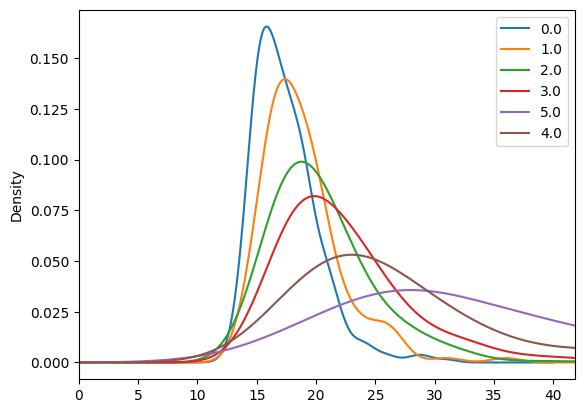

In [430]:
means_simul_r = []
for i in set(df ['phase'].values) : 
    if i != 100.00 : 
        tau = df[df['phase']==i]
        tau_r = tau[tau['viralParams']=='R']
        tau_r = tau_r[tau_r['tau']>0]
        tau_r['tau'].plot.kde(label=str(i), xlim=0.)
plt.legend()

In [291]:
data = []

for f in range(50) : 
    
    df = pd.read_csv('../data/seir/simulated/IC/low_beta/final_host'+str(f)+'.csv')
    means_simul_r = []
    ks = []
    df = df[df['status']=='R']
    for i in sorted(set(df ['phase'].values)) : 
        if i != 100.00 : 
            tau = df[df['phase']==i]
            tau_r = tau[tau['viralParams']=='R']
            tau_r = tau_r[tau_r['tau']>0]
            means_simul_r.append(np.mean(tau_r['tau'].values))
            ks.append(i)
    data.append(means_simul_r)

In [292]:
analitic_tau_at_low_r = []
analitic_tau_at_low_f = []
for f in range(0,50,1) : 
    df = pd.read_csv('../data/seir/analytic/IC/low_beta/ic_t'+str(f)+'.csv')
    df_r = df[df['0']==str({'mu':0.1,'sb':0.5, 'sd':0.05})]
    analitic_tau_at_low_r += list(df_r[df_r['1']>0]['1'].values)
    
    df_f = df[df['0']==str({'mu':0.1,'sb':0.5, 'sd':0.9})]
    analitic_tau_at_low_f += list(df_f[df_f['1']>0]['1'].values)
    
anal_low_df_f = pd.DataFrame(analitic_tau_at_low_f)
anal_low_df_r = pd.DataFrame(analitic_tau_at_low_r)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

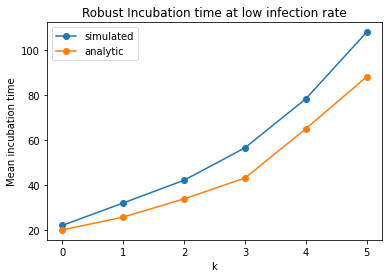

In [293]:
plt.title('Robust Incubation time at low infection rate')
plt.plot(ks,np.mean(data, axis=0), 'o-', label="simulated")
plt.plot(mean_anal_r, 'o-', label="analytic")
plt.xlabel('k')
plt.ylabel('Mean incubation time')
plt.legend()
plt.savefig('Seir_IC_N5.pdf')

# R0 Analysis

In [447]:
df = pd.read_csv('../data/seir/simulated/R0/low_beta/final_host0.csv')

In [461]:
r0 = df[df['I_id']>0]
r0_f = r0[r0['viralParams']=='F']

r0_r = r0[r0['viralParams']=='R']

In [483]:
list_r0_r = list(r0_r['I_id'].values)

I_id = list(set(list_r0_r))
S_countR = []
for id_ in I_id : 
    S_countR.append(list_r0_r.count(id_))
    
  

([<matplotlib.axis.XTick at 0x1340d2dc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Te

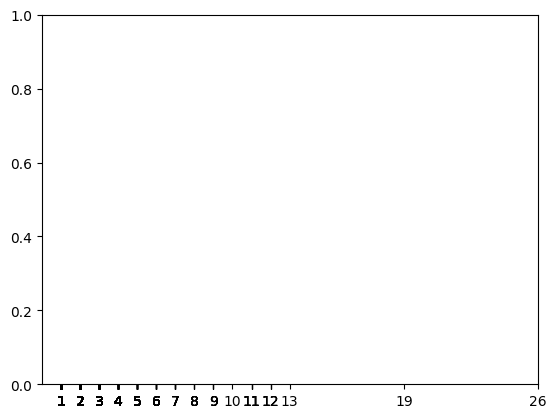

In [487]:
plt.xticks(S_countR)

In [481]:
list_r0_f = list(r0_f['I_id'].values)

I_id_f = set(list_r0_f)
S_countF = []
for id_ in I_id_f : 
    S_countF.append(list_r0_f.count(id_))
    
  

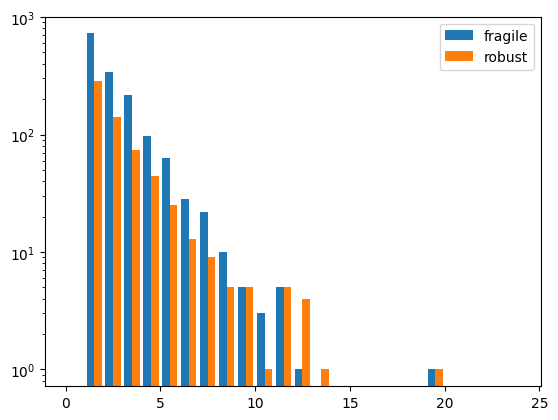

In [496]:
plt.hist([S_countF,S_countR],range(25),log=True, label=['fragile', 'robust'])
plt.legend()

In [499]:
with open('../data/seir/simulated/R0/low_beta/R0/I_id_data0.json','r') as fp : 
    json_ids = json.load(fp)

In [524]:
R_0 = np.array(json_ids['2'])
R_0 = list(R_0[R_0>0])

In [525]:
counters2 = []

for id_ in set(R_0) :
    counters2.append(R_0.count(id_)) 
    

(array([[ 0., 60., 31.,  9.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 41., 33., 14., 11.,  1.,  0.,  0.,  0.]]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 2 BarContainer objects>)

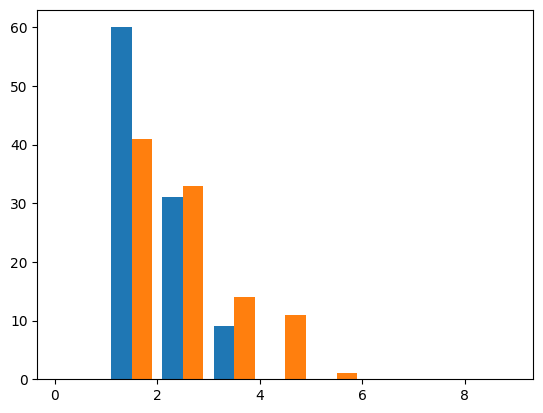

In [526]:
plt.hist([counters, counters2], bins=range(10))

In [527]:
df = pd.read_csv('../data/seir/simulated/R0/low_beta/R0/host0.csv')

In [60]:
R = []
I_f = []
I_r = []
mean_R0_r = []
mean_R0_f = []
df_final = pd.read_csv('../data/seir/simulated/R0/low_beta/R0/host999.csv')
df0 = pd.read_csv('../data/seir/simulated/R0/low_beta/R0/host0.csv')
s = len(df0[df0['status']=='S'].values)
#df_final = df_final[df_final['status']=='R']
e_r = 0.
e_f = 0.
for i in range(1,1000) : 
    print(i)
    df1 = pd.read_csv('../data/seir/simulated/R0/low_beta/R0/host'+str(i)+'.csv')
 
    s1 = len(df[df['status']=='S'].values)
    df = pd.read_csv('../data/seir/simulated/R0/low_beta/R0/host'+str(i-1)+'.csv')
    s0 = len(df1[df1['status']=='S'].values)
    R.append(len(df_R.values))
    
    df_R = df[df['status']=='R']
    df_R1 = df1[df1['status']=='R']
    I_id_dist_r = []
    
    df_R_r = df[df['viralParams']=='R']
    df_R_r1 = df1[df1['viralParams']=='R']
    
    print(str(i-1),len(set(df_R_r[df_R_r['I_id']>0]['I_id'].values)))
    if s1-s0 > 0 : 
        e_r += s1-s0 
        e_f += s1-s0 
    if i==0 : 
        for id_ in set(df_R_r[df_R_r['I_id']>0]['I_id'].values) : 
            I_id_dist_r.append(len(df_final[df_final['I_id']==id_].values))
    else : 
        for id_ in set(df_R_r1[df_R_r1['I_id']>0]['I_id'].values) - set(df_R_r[df_R_r['I_id']>0]['I_id'].values) : 
            I_id_dist_r.append(len(df_final[df_final['I_id']==id_].values))
    print('zeros', (s1-s0),s-s0)
    print(str(i-1),len(set(df_R_r[df_R_r['I_id']>0]['I_id'].values)))
    if len(I_id_dist_r) >0 : 
        print( "Taille======", len(I_id_dist_r))
        mean_R0_r.append(np.mean(I_id_dist_r))
        e_r = 0.
        
    else : 
        print(i)
    
    
    I_id_dist_f = []
    
    df_R_f = df[df['viralParams']=='F']
    df_R_f1 = df1[df1['viralParams']=='F']
    if i==0 : 
        for id_ in set(df_R_f[df_R_f['I_id']>0]['I_id'].values) : 
            I_id_dist_f.append(len(df_final[df_final['I_id']==id_].values))
    else : 
        for id_ in set(df_R_f1[df_R_f1['I_id']>0]['I_id'].values) - set(df_R_f[df_R_f['I_id']>0]['I_id'].values) : 
            I_id_dist_f.append(len(df_final[df_final['I_id']==id_].values))
    
    if len(I_id_dist_f) >0 : 
        print("Taille======", len(I_id_dist_f),  len(set(df_R_f1[df_R_f1['I_id']>0]['I_id'].values)),len(set(df_R_f[df_R_f['I_id']>0]['I_id'].values)))
        mean_R0_f.append(np.mean(I_id_dist_f))
        e_f  = 0. 
        
    

FileNotFoundError: [Errno 2] No such file or directory: '../data/seir/simulated/R0/low_beta/R0/host999.csv'

In [79]:
df = pd.read_csv('../data/seir/simulated/R0/low_beta/R0/0/host999.csv')
infectious_id = list(df[df['I_id']>0]['I_id'].values)
len(set(df[df['I_id']>0]['I_id'].values))
df

,Unnamed: 0,id,status,viralParams,I_id,E_nb,phase
0,0,0,R,R,3762.0,2.0,1.0
1,1,1,R,F,268.0,0.0,0.0
2,2,2,R,R,120.0,2.0,100.0
3,3,3,R,R,4990.0,9.0,0.0
4,4,4,R,R,3639.0,0.0,2.0
...,...,...,...,...,...,...,...
4995,4995,4995,R,R,-1.0,2.0,0.0
4996,4996,4996,R,R,-1.0,2.0,0.0
4997,4997,4997,R,R,-1.0,17.0,0.0
4998,4998,4998,R,R,-1.0,0.0,0.0


In [80]:
def get_meanNI(genome_type, log_folder) : 
   
    time_id = []
    unique_ids = []
    R0 = []
    df_final = pd.read_csv('../data/seir/simulated/R0/'+log_folder+'/host999.csv')
    df_final = df_final[df_final['status']=='R']
    #df_final = df_final[df_final['E_nb']>0]
    
    infectious_id = list(df_final[df_final['I_id']>0]['I_id'].values)
    r0_s = {}
    for id_ in df_final['id'].values: 
        r0_s[id_]= float(infectious_id.count(id_))
    #print (len(r0_s.keys()))
    
    for i in range(1,999) : 
        df = pd.read_csv('../data/seir/simulated/R0/'+log_folder+'/host'+str(i)+'.csv')
        df_I = df[df['status']=='I']
        df_E = df[df['status']=='S']
        df_I = df_I[df_I['viralParams']==genome_type]
        ids = set(df_I['id'].values)
       
        if len(ids) > 0 : 
            next_ids = []
            for elt in ids : 
                if elt < 4900.0 : 
                    try : 
                        next_ids.append(r0_s[elt])
                    except KeyError : 
                        print('KeyError')
                        continue
            if len(next_ids)>0 : 
                R0.append(np.mean(next_ids))
    return R0

In [82]:
R0_robust = []
R0_fragile = []
for i in range(50) : 
    log_folder = "low_beta/R0/"+str(i)
    print(log_folder)
    R0_robust.append(get_meanNI('R', log_folder))
    R0_fragile.append(get_meanNI('F',log_folder))

low_beta/R0/0
low_beta/R0/1
low_beta/R0/2
low_beta/R0/3
low_beta/R0/4
low_beta/R0/5
low_beta/R0/6
low_beta/R0/7
low_beta/R0/8
low_beta/R0/9
low_beta/R0/10
low_beta/R0/11
low_beta/R0/12
low_beta/R0/13
low_beta/R0/14
low_beta/R0/15
low_beta/R0/16
low_beta/R0/17
low_beta/R0/18
low_beta/R0/19
low_beta/R0/20
low_beta/R0/21
low_beta/R0/22
low_beta/R0/23
low_beta/R0/24
low_beta/R0/25
low_beta/R0/26
low_beta/R0/27
low_beta/R0/28
low_beta/R0/29
low_beta/R0/30
low_beta/R0/31
low_beta/R0/32
low_beta/R0/33
low_beta/R0/34
low_beta/R0/35
low_beta/R0/36
low_beta/R0/37
low_beta/R0/38
low_beta/R0/39
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
low_beta/R0/40
low_beta/R0/41
low_beta/R0/42
low_beta/R0/43
low_beta/R0/44
low_beta/R0/45
low_beta/R0/46
low_beta/R0/47
low_beta/R0/48
low_beta/R0/49


In [83]:
low_R0_r = []

for i in range(184) : 
     
    mean_list = []
    for list_ in R0_robust : 
        mean_list.append(list_[i])
    low_R0_r.append(np.mean(mean_list))
    
        

In [84]:
low_R0_f = []

for i in range(300) : 
     
    mean_list = []
    for list_ in R0_fragile : 
        mean_list.append(list_[i])
    low_R0_f.append(np.mean(mean_list))
    

In [85]:
R0_robust_high = []
R0_fragile_high = []
for i in range(50) : 
    log_folder = "high_beta/R0/"+str(i)
    print(log_folder)
    R0_robust_high.append(get_meanNI('R', log_folder))
    R0_fragile_high.append(get_meanNI('F',log_folder))

high_beta/R0/0
high_beta/R0/1
high_beta/R0/2
high_beta/R0/3
high_beta/R0/4
high_beta/R0/5
high_beta/R0/6
high_beta/R0/7
high_beta/R0/8
high_beta/R0/9
high_beta/R0/10
high_beta/R0/11
high_beta/R0/12
high_beta/R0/13
high_beta/R0/14
high_beta/R0/15
high_beta/R0/16
high_beta/R0/17
high_beta/R0/18
high_beta/R0/19
high_beta/R0/20
high_beta/R0/21
high_beta/R0/22
high_beta/R0/23
high_beta/R0/24
high_beta/R0/25
high_beta/R0/26
high_beta/R0/27
high_beta/R0/28
high_beta/R0/29
high_beta/R0/30
high_beta/R0/31
high_beta/R0/32
high_beta/R0/33
high_beta/R0/34
high_beta/R0/35
high_beta/R0/36
high_beta/R0/37
high_beta/R0/38
high_beta/R0/39
high_beta/R0/40
high_beta/R0/41
high_beta/R0/42
high_beta/R0/43
high_beta/R0/44
high_beta/R0/45
high_beta/R0/46
high_beta/R0/47
high_beta/R0/48
high_beta/R0/49


In [86]:
high_R0_r = []

for i in range(40) : 
     
    mean_list = []
    for list_ in R0_robust_high : 
        mean_list.append(list_[i])
    high_R0_r.append(np.mean(mean_list))

high_R0_f = []

for i in range(40) : 
     
    mean_list = []
    for list_ in R0_fragile_high : 
        mean_list.append(list_[i])
    high_R0_f.append(np.mean(mean_list))
       
        

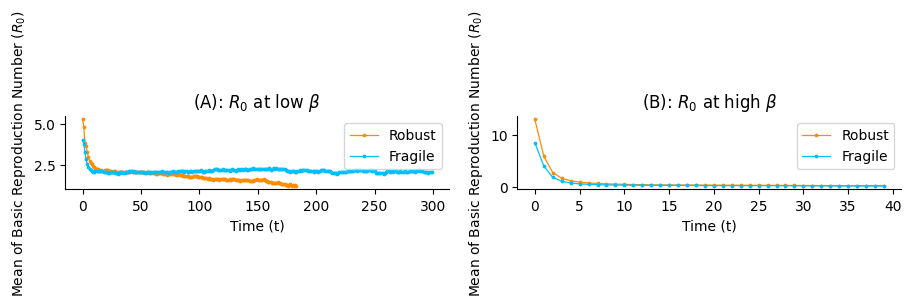

In [87]:
figure = plt.figure(constrained_layout=True, figsize=(9,4))
gs = figure.add_gridspec(nrows=4, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel(r'Time (t)')
plt.ylabel(r'Mean of Basic Reproduction Number ($R_0$)')
plt.plot(low_R0_r,'o-', label='Robust', color='darkorange', ms=1.7, linewidth=0.9)
plt.plot(low_R0_f, 'o-', label='Fragile', color='deepskyblue', ms=1.7, linewidth=0.9)
plt.title(r'(A): $R_0$ at low $\beta$')
plt.legend()

ax = figure.add_subplot(gs[0,1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xlabel(r'Time (t)')
plt.ylabel(r'Mean of Basic Reproduction Number ($R_0$)')
plt.plot(high_R0_r,'o-', label='Robust', color='darkorange', ms=1.7, linewidth=0.9)
plt.plot(high_R0_f, 'o-', label='Fragile', color='deepskyblue', ms=1.7, linewidth=0.9)
plt.title(r'(B): $R_0$ at high $\beta$')
plt.legend()
plt.savefig('seir/R0.pdf')
plt.show()

In [88]:
def get_meanIT(genome_type, log_folder) : 
   
    time_id = []
    unique_ids = []
    IT = []
    df_final = pd.read_csv('../data/seir/simulated/IC/'+log_folder+'/host999.csv')
    df_final = df_final[df_final['status']=='R']
    #df_final = df_final[df_final['E_nb']>0]
   
    for i in range(1,999) : 
        df = pd.read_csv('../data/seir/simulated/IC/'+log_folder+'/host'+str(i)+'.csv')
        df_I = df[df['status']=='I']
        df_E = df[df['status']=='S']
        df_I = df_I[df_I['viralParams']==genome_type]
        ids = set(df_I['id'].values)
       
        if len(ids) > 0 : 
            next_ids = []
            for elt in ids : 
                if elt < 4900.0 : 
                    try : 
                        next_ids.append(df_final[df_final['id']==elt]['tau'].values[0])
                    except KeyError : 
                        print('KeyError')
                        continue
            if len(next_ids)>0 : 
                IT.append(next_ids)
    return IT

In [104]:
distIT_robust_low = []
distIT_fragile_low = []
for i in range(50) : 
    
    log_folder = "low_beta/"+str(i)
    distIT_robust_low.append(get_meanIT('R', log_folder))
    distIT_fragile_low.append(get_meanIT('F',log_folder))
    print(log_folder)

low_beta/0
low_beta/1
low_beta/2
low_beta/3
low_beta/4
low_beta/5
low_beta/6
low_beta/7
low_beta/8
low_beta/9
low_beta/10
low_beta/11
low_beta/12
low_beta/13
low_beta/14
low_beta/15
low_beta/16
low_beta/17
low_beta/18
low_beta/19
low_beta/20
low_beta/21
low_beta/22
low_beta/23
low_beta/24
low_beta/25
low_beta/26
low_beta/27
low_beta/28
low_beta/29
low_beta/30
low_beta/31
low_beta/32
low_beta/33
low_beta/34
low_beta/35
low_beta/36
low_beta/37
low_beta/38
low_beta/39
low_beta/40
low_beta/41
low_beta/42
low_beta/43
low_beta/44
low_beta/45
low_beta/46
low_beta/47
low_beta/48
low_beta/49


In [105]:
distIT_robust_high = []
distIT_fragile_high = []

for i in range(20) : 
    log_folder = "high_beta/"+str(i)
    distIT_robust_high.append(get_meanIT('R', log_folder))
    distIT_fragile_high.append(get_meanIT('F',log_folder))
    print(log_folder)

high_beta/0
high_beta/1
high_beta/2
high_beta/3
high_beta/4
high_beta/5
high_beta/6
high_beta/7
high_beta/8
high_beta/9
high_beta/10
high_beta/11
high_beta/12
high_beta/13
high_beta/14
high_beta/15
high_beta/16
high_beta/17
high_beta/18
high_beta/19


In [109]:
med_data_r = []
min_data_r = []
max_data_r = []
for i in range(50) : 
    
    med_r = []
    
    for list_ in distIT_robust_low[i]  [:250]: 
        med_r.append([np.min(list_),np.median(list_),np.max(list_)])
    med_r = np.array(med_r)
    med_data_r.append(med_r[:,1])
    min_data_r.append(med_r[:,0])
    max_data_r.append(med_r[:,2])
    

In [110]:
data_r = [[]]*250
for i in range(50) : 
    for j in range(250): 
        data_r[j] = data_r[j]+ distIT_robust_low[i] [j]
        
data_f = [[]]*250
for i in range(50) : 
    for j in range(250): 
        data_f[j] = data_f[j]+ distIT_fragile_low[i] [j]

data_r_high = [[]]*45
for i in range(20) : 
    for j in range(45): 
        data_r_high[j] = data_r_high[j]+ distIT_robust_high[i] [j]

data_f_high = [[]]*45
for i in range(20) : 
    for j in range(45): 
        data_f_high[j] = data_f_high[j]+ distIT_fragile_high[i] [j]



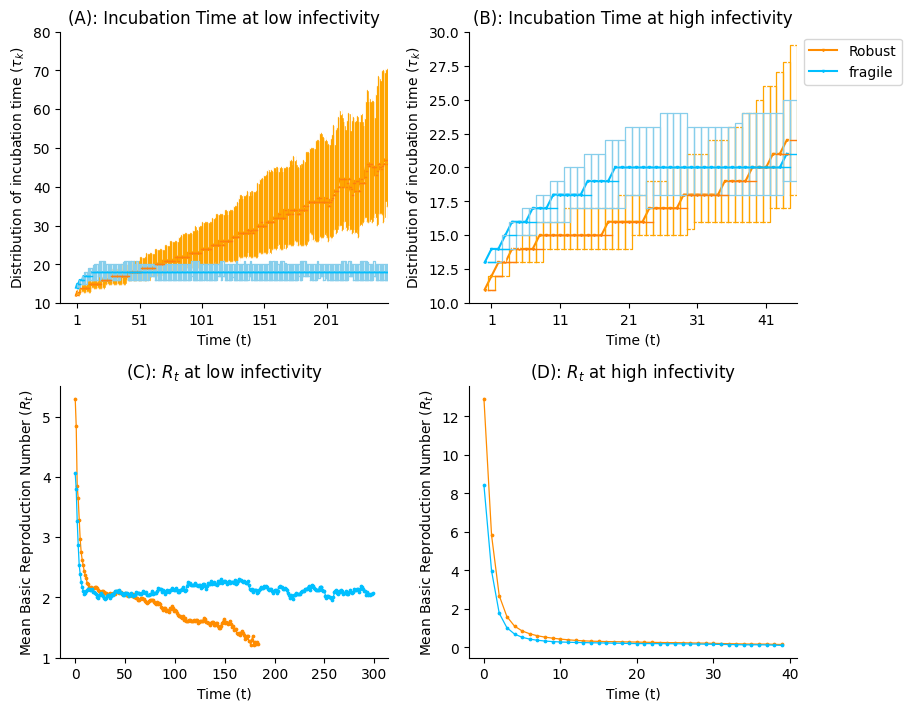

In [126]:
figure = plt.figure(constrained_layout=True, figsize=(9,7))
gs = figure.add_gridspec(nrows=2, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel(r'Time (t)')
plt.ylabel(r'Distribution of incubation time ($\tau_k$)')
ax.plot([np.median(data_r[i]) for i in range(len(data_r))], 'v-',ms=1.5, color='darkorange' , label='Robust')
ax.boxplot(data_r,showcaps=False,whiskerprops=dict(color='white'), 
                   showbox=True, showfliers=False,widths=1,boxprops=dict(color='orange',linewidth=0.9))
ax.plot([np.median(data_f[i]) for i in range(len(data_f))],color='deepskyblue' , label='fragile')
ax.boxplot(data_f,showcaps=False,whiskerprops=dict(color='white', linewidth=0), 
                   showbox=True, showfliers=False,widths=1,boxprops=dict(color='skyblue',linewidth=0.9), medianprops=dict(color='deepskyblue'))
ax.set_ylim([10,80.])
plt.xticks(range(1,250,50),range(1,250,50))
plt.title(r'(A): Incubation Time at low infectivity')
#plt.legend()

ax = figure.add_subplot(gs[0,1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xlabel(r'Time (t)')
plt.ylabel(r'Distribution of incubation time ($\tau_k$)')
ax.plot([np.median(data_r_high[i]) for i in range(len(data_r_high))],'v-', ms=1.5, color='darkorange' , label='Robust')
ax.boxplot(data_r_high,showcaps=False,whiskerprops=dict(color='white'), 
                   showbox=True, showfliers=False,widths=1,boxprops=dict(color='orange',linewidth=0.9))
ax.plot([np.median(data_f_high[i]) for i in range(len(data_f_high))],'v-',ms=1.5, color='deepskyblue' , label='fragile')
ax.boxplot(data_f_high,showcaps=False,whiskerprops=dict(color='white', linewidth=0), 
                   showbox=True, showfliers=False,widths=1,boxprops=dict(color='skyblue',linewidth=0.9), medianprops=dict(color='deepskyblue'))

ax.set_ylim([10,30.])
plt.xticks(range(1,50,10),range(1,50,10))
plt.title(r'(B): Incubation Time at high infectivity')
plt.legend(bbox_to_anchor=(1., 1.0))
#plt.legend()

ax = figure.add_subplot(gs[1,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel(r'Time (t)')
plt.ylabel(r'Mean Basic Reproduction Number ($R_t$)')
plt.plot(low_R0_r,'o-', label='Robust', color='darkorange', ms=1.7, linewidth=0.9)
plt.plot(low_R0_f, 'o-', label='Fragile', color='deepskyblue', ms=1.7, linewidth=0.9)
plt.title(r'(C): $R_t$ at low infectivity')
#plt.legend()

ax = figure.add_subplot(gs[1,1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xlabel(r'Time (t)')
plt.ylabel(r'Mean Basic Reproduction Number ($R_t$)')
plt.plot(high_R0_r,'o-', label='Robust', color='darkorange', ms=1.7, linewidth=0.9)
plt.plot(high_R0_f, 'o-', label='Fragile', color='deepskyblue', ms=1.7, linewidth=0.9)
plt.title(r'(D): $R_t$ at high infectivity ')

plt.savefig('seir/IT_Rt.pdf')
plt.show()

In [13]:
def reproduce(pop, s_b,s_d, mu, T,  C=100) : 
    
    
    pop_0 = np.copy(pop)
    
    f = lambda i, s_d: ((1-s_d)**i)
    t = 0
    
    while 0<len(pop_0) < C and t<T: 
        pop_n = np.array(pop_0)*f(np.random.poisson(mu,len(pop_0)),s_d)
        survivors = np.random.binomial(1,pop_n/2.,len(pop_n))
        pop_0 = list(pop_n[np.where(survivors==1)[0]])*2
        t = t + 1 
              
    return pop_0,t

def reproduce2(pop, s_b,s_d, mu, T,  C=100) : 
    
    
    pop_0 = np.copy(pop)
    
    f = lambda i, s_d: ((1-s_d)**i)
    t = 0
    while 0<len(pop_0)<C : 
        ks = np.random.poisson(pop_0, size=len(pop_0))
        pop_n = np.array(pop_0)*f(np.random.poisson(mu,len(pop_0)),s_d)
        pop = []
        for i in range(len(ks)) : 
            pop.append([pop_n[i]]*ks[i])

        pop_0 = list(np.concatenate(pop))
        t = t + 1 
        
              
    return pop_0, t


def reproduce_with_bottleneck(pop, s_b,s_d, mu, T,B, nb_bn, C=100) : 
    
    
    pop_0 = np.copy(pop)
    
    f = lambda i, s_d: ((1-s_d)**i)
    t = 0
    b = 0
    mean_fitness = [np.mean(pop)]
    while (b<nb_bn) and (t<T) : 
        ks = np.random.poisson(pop_0, size=len(pop_0))
        pop_n = np.array(pop_0)*f(np.random.poisson(mu,len(pop_0)),s_d)
        new_pop = []
        for i in range(len(ks)) : 
            new_pop.append([pop_n[i]]*ks[i])
        if len(new_pop) > 0 : 
            next_pop = list(np.concatenate(new_pop))
        else : 
            return new_pop,mean_fitness
        t = t + 1 
         
        if len(pop_0) >= C :
            pop_0 = np.random.choice(next_pop, size=B)
            b = b+1
        else : 
            pop_0 = np.copy(next_pop) 
        mean_fitness.append(np.mean(next_pop))  
    return next_pop, mean_fitness

In [45]:
sd = 0.05 
sb = 0.5
mu = 0.2 
T = 100 
nb_bn =100 
pop = np.ones(10)*(1.+sb)
B = 10

robustbn_mean_fitness = []
for i in range(100) :
    lastpop,mean_fit = reproduce_with_bottleneck(pop, sb,sd, mu, T,B, nb_bn, C=100) 
    robustbn_mean_fitness.append(mean_fit)

/usr/local/Cellar/jupyterlab/2.2.6/libexec/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/Cellar/jupyterlab/2.2.6/libexec/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [19]:

lastpop

[]

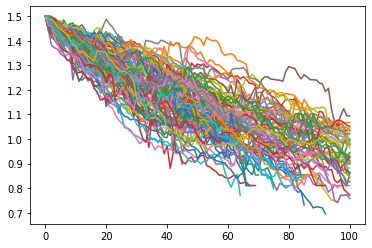

In [47]:
for i in range(100) : 
    plt.plot(robustbn_mean_fitness[i])

In [34]:
class Individual(object) : 

    def __init__(self, id_, fitness): 

        self.id_ = id_
        self.fitness = fitness


def fitness (id_) : 
    if id_=="L" :
        return 1. 
    else : 
        return 0.

def fitness_proportion_selection(population, size) : 
        
    fitnesses = []
    for ind in population : 
        fitnesses.append(ind.fitness)

    selected = np.random.choice(population,size=size,p=np.array(fitnesses)/sum(fitnesses))
    return selected
#Mutation function 

def mutateOne(individual, mut_p,) :  
    id_ = "L"
    r = random.uniform(0,1)
    if r < mut_p: 
        id_ = "D"
    
    return Individual( id_, fitness(id_))

def mutateAll(population, mut_prob) : 
    mutated_pop = [] 
    for individual in population : 
        mutated_pop.append(mutateOne(individual,mut_prob))
    return mutated_pop

def simple_EA(number_of_generation, mut_prob, init_pop) : 
    
        print (" Starting of evolution ")
        prev_population = np.copy(init_pop)
        
        population_size =  len(init_pop)
        n = number_of_generation
        mean_fitness = numpy.mean([ind.fitness for ind in prev_population])
        mean_data = []
        mean_data.append(mean_fitness)
        while n > 0  :
            if (number_of_generation - n)%100 == 0 : 
                print ('Generation '+str(number_of_generation - n))
            selected_ind = fitness_proportion_selection(prev_population,population_size)

            newgeneration = mutateAll(selected_ind,mut_prob)
            
            prev_population = np.copy(newgeneration)
            mean_fitness = numpy.mean([ind.fitness for ind in prev_population])
            
            mean_data.append(mean_fitness)
            n -=1

        return mean_data, newgeneration, 

def mutateOne1(individual, mut_p,delta =0.1) :  
    id_ = "L"
    r = random.uniform(0,1)
    if r < mut_p: 
        if individual.fitness >= delta :
            individual.fitness = individual.fitness - delta
    
    return individual

def mutateAll1(population, mut_prob) : 
    mutated_pop = [] 
    for individual in population : 
        mutated_pop.append(mutateOne1(individual,mut_prob))
    return mutated_pop

def simple_EA1(number_of_generation, mut_prob, init_pop) : 
    
        print (" Starting of evolution ")
        prev_population = np.copy(init_pop)
        
        
        population_size =  len(init_pop)
        n = number_of_generation
        mean_fitness = numpy.mean([ind.fitness for ind in prev_population])
        mean_data = []
        mean_data.append(mean_fitness)
        while n > 0  :
            if (number_of_generation - n)%100 == 0 : 
                print ('Generation '+str(number_of_generation - n))
            selected_ind = fitness_proportion_selection(prev_population,population_size)

            newgeneration = mutateAll1(selected_ind,mut_prob)
            
            prev_population = np.copy(newgeneration)
            mean_fitness = numpy.mean([ind.fitness for ind in prev_population])
            
            mean_data.append(mean_fitness)
            n -=1

        return mean_data, newgeneration, 


def fragile_EA(t, mu, N) : 
    
        print (" Starting of evolution ")
        prev_population = np.ones(N)*1.5
        n = 0
        mean_data = []
        mean_data.append(np.mean(prev_population))
        while n < t  :
            if n%100 == 0 : 
                print ('Generation '+str(n))
            selected_ind = np.random.choice(prev_population,size=N,p=np.array(prev_population)/sum(prev_population))
            r = np.random.rand(N)
            selected_ind[r<mu] = 0 
            
            prev_population = np.copy(selected_ind)
            mean_fitness = np.mean(prev_population)
            
            mean_data.append(mean_fitness)
            n +=1

        return mean_data 
    
    
    

def robbust_EA(t, mu, N, d=0.05) : 
        #d = 1./N
        print (" Starting of evolution ")
        prev_population = np.ones(N)*1.5
        n = 0
        mean_data = []
        mean_data.append(np.mean(prev_population))
        while n < t  :
            if n%100 == 0 : 
                print ('Generation '+str(n))
            selected_ind = np.random.choice(prev_population,size=N,p=np.array(prev_population)/sum(prev_population))
            r = np.random.rand(N)
            selected_ind[r<mu] =selected_ind[r<mu]-d
            selected_ind [selected_ind<0] = 0
            prev_population = np.copy(selected_ind)
            
            mean_fitness = np.mean(prev_population)
            
            mean_data.append(mean_fitness)
            n +=1

        return mean_data, prev_population

In [43]:
fragile_means = []
rubost_means = []

for i in range(100) : 
    
    fragile_means.append(fragile_EA(t = 100, mu=0.2, N = 10000))
    rubost_means.append(robbust_EA(t = 100, mu=0.2, N = 10000)[0])



 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 Starting of evolution 
Generation 0
 

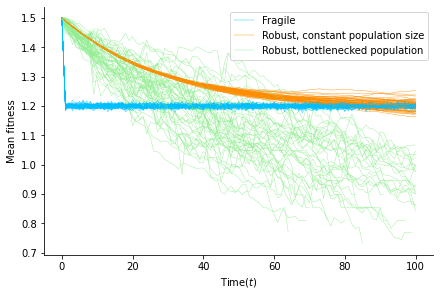

In [69]:
figure = plt.figure(constrained_layout=True, figsize=(6,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)

ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.plot(fragile_means[0],color="deepskyblue", label="Fragile",linewidth=.4)
plt.plot(rubost_means[0], color="darkorange", label="Robust, constant population size",linewidth=.4)
plt.plot(robustbn_mean_fitness[0], color="lightgreen", label='Robust, bottlenecked population',linewidth=.4)

for i in range(1, 50) : 
    
    plt.plot(rubost_means[i], color="darkorange", linewidth=.4)
    plt.plot(fragile_means[i], color="deepskyblue",linewidth=.4)
    plt.plot(robustbn_mean_fitness[i], color='lightgreen',linewidth=.4)
plt.legend(loc='upper right')
plt.xlabel(r"Time($t$)")
plt.ylabel("Mean fitness")
#plt.title(r'$N= 1000000, \mu=0.5, t=500 $')
plt.savefig('fig1.pdf')
plt.show()

In [50]:
t = np.arange(0,120,1.)
print(t)
W1 = 0.85
W2 = 1-0.0015*t 

W3 = np.piecewise(t, [t<20., [l(20,t_i,40) for t_i in t], [l(40,t_i,60) for t_i in t], [l(60,t_i,80) for t_i in t]], [lambda t: 1., lambda t: 0.8+0.2*np.exp(-t+20), lambda t: 0.6+0.2*np.exp(-t+40),
                                                         lambda t: 0.4+0.2*np.exp(-t+60) ])


[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119.]


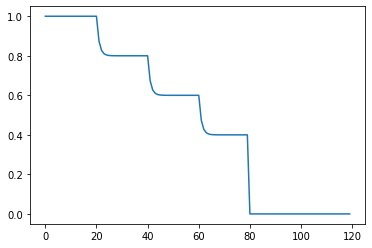

In [51]:
plt.plot(W3)

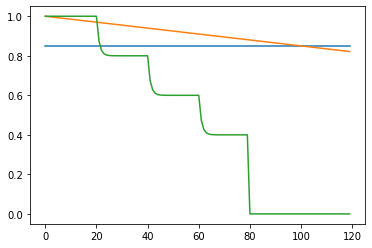

In [52]:
plt.plot(t,np.ones(len(t))*W1)
plt.plot(t,W2)
plt.plot(t,W3)

In [49]:
0.4+0.2*np.exp(-t+80)

array([1.10812448e+34, 4.07656213e+33, 1.49968340e+33, 5.51702691e+32,
       2.02960078e+32, 7.46648399e+31, 2.74676596e+31, 1.01047873e+31,
       3.71734349e+30, 1.36753425e+30, 5.03087734e+29, 1.85075635e+29,
       6.80855210e+28, 2.50472634e+28, 9.21437327e+27, 3.38977849e+27,
       1.24702982e+27, 4.58756632e+26, 1.68767133e+26, 6.20859587e+25,
       2.28401478e+25, 8.40242081e+24, 3.09107787e+24, 1.13714400e+24,
       4.18331899e+23, 1.53895705e+23, 5.66150661e+22, 2.08275189e+22,
       7.66201600e+21, 2.81869816e+21, 1.03694111e+21, 3.81469314e+20,
       1.40334718e+20, 5.16262577e+19, 1.89922388e+19, 6.98685421e+18,
       2.57032002e+18, 9.45567894e+17, 3.47854988e+17, 1.27968699e+17,
       4.70770534e+16, 1.73186801e+16, 6.37118635e+15, 2.34382847e+15,
       8.62246309e+14, 3.17202690e+14, 1.16692349e+14, 4.29287160e+13,
       1.57925920e+13, 5.80976993e+12, 2.13729492e+12, 7.86266859e+11,
       2.89251413e+11, 1.06409648e+11, 3.91459219e+10, 1.44009799e+10,
      

In [15]:
x = np.linspace(-2.5, 2.5, 6)
np.piecewise(x, [x < 0, x >= 0], [lambda x: -x, lambda x: x])

array([2.5, 1.5, 0.5, 0.5, 1.5, 2.5])

In [34]:
l = lambda l,t,r: True if l<=t<r else False

In [36]:
[len(t<20.), len([l(20,t_i,40) for t_i in t]) ]

[100, 100]

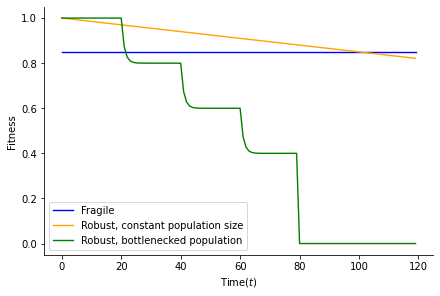

In [59]:
figure = plt.figure(constrained_layout=True, figsize=(6,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)

ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.plot(t,np.ones(len(t))*W1,color="blue", label="Fragile",linewidth=1.4)
plt.plot(t,W2, color="orange", label="Robust, constant population size",linewidth=1.4)
plt.plot(t,W3, color="green", label='Robust, bottlenecked population',linewidth=1.4)
plt.legend()
plt.xlabel(r"Time($t$)")
plt.ylabel("Fitness")
#plt.title(r'$N= 1000000, \mu=0.5, t=500 $')
plt.savefig('fig1_anal.pdf')
plt.show()